<center>
  <img src="https://venngage-wordpress.s3.amazonaws.com/uploads/2021/08/a86e6bdc-e041-4537-b351-77b4cbc1d616-1.png" alt="Insurance Project Banner" width="800"/>
</center>

#About Dataset
The training data contain transaction history for customers that ended up purchasing a policy. For each customer_ID, you are given their quote history. In the training set you have the entire quote history, the last row of which contains the coverage options they purchased.

What is a customer?

Each customer has many shopping points, where a shopping point is defined by a customer with certain characteristics viewing a product and its associated cost at a particular time.
• Some customer characteristics may change over time (e.g. as the customer changes or provides new information), and the cost depends on both the product and the customer characteristics.
• A customer may represent a collection of people, as policies can cover more than one person.
• A customer may purchase a product that was not viewed!
Product Options
Each product has 7 customizable options selected by customers, each with 2, 3, or 4 ordinal values possible:

A product is simply a vector with length 7 whose values are chosen from each of the options listed above. The cost of a product is a function of both the product options and customer characteristics.

#Variable Descriptions

customer_ID - A unique identifier for the customer

shopping_pt - Unique identifier for the shopping point of a given customer

record_type - 0=shopping point, 1=purchase point

day - Day of the week (0-6, 0=Monday)

time - Time of day (HH:MM)

state - State where shopping point occurred

location - Location ID where shopping point occurred

group_size - How many people will be covered under the policy (1, 2, 3 or 4)

homeowner - Whether the customer owns a home or not (0=no, 1=yes)

car_age - Age of the customer’s car

car_value - How valuable was the customer’s car when new

risk_factor - An ordinal assessment of how risky the customer is (1, 2, 3, 4)

age_oldest - Age of the oldest person in customer's group

age_youngest - Age of the youngest person in customer’s group

married_couple - Does the customer group contain a married couple (0=no, 1=yes)

C_previous - What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)

duration_previous - how long (in years) the customer was covered by their previous issuer

A,B,C,D,E,F,G - the coverage options

cost - cost of the quoted coverage options

###Workflow Overview

| Step                     | Description                                                               |
| ------------------------ | ------------------------------------------------------------------------- |
| **1. Data Exploration**  | Loaded dataset, checked structure, data types, and initial issues         |
| **2. Data Cleaning**     | Handled missing values, filled with appropriate strategies (mode, median) |
| **3. Feature Selection** | Selected relevant features for prediction                                 |
| **4. Default Model**     | Trained a baseline Decision Tree Regressor                                |
| **5. Manual Tuning**     | Tuned `max_depth`, `min_samples_split`, etc. manually                     |
| **6. GridSearchCV**      | Applied cross-validated hyperparameter tuning for optimal performance     |
| **7. Model Evaluation**  | Compared models using R² and MSE metrics                                  |
| **8. Final Results**     | Found that GridSearchCV-tuned model performed best                        |
| **9. Interpretation**    | Visualized the tree, extracted feature importance                         |


###Step 1: Load and Understand the Data
Load the CSV file

View sample rows (head())

Understand each column (feature and target)

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("train.csv")
df.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [35]:
df.tail()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
665244,10152724,2,0,3,13:43,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665245,10152724,3,0,3,13:43,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665246,10152724,4,0,3,13:44,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665247,10152724,5,0,3,13:46,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,685
665248,10152724,6,1,1,15:14,KY,10204,1,1,1,...,4.0,4.0,1,0,3,3,0,2,2,681


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   time               665249 non-null  object 
 5   state              665249 non-null  object 
 6   location           665249 non-null  int64  
 7   group_size         665249 non-null  int64  
 8   homeowner          665249 non-null  int64  
 9   car_age            665249 non-null  int64  
 10  car_value          663718 non-null  object 
 11  risk_factor        424831 non-null  float64
 12  age_oldest         665249 non-null  int64  
 13  age_youngest       665249 non-null  int64  
 14  married_couple     665249 non-null  int64  
 15  C_previous         646538 non-null  float64
 16  du

###Step 2: Data Preprocessing
Check for missing values

Encode categorical features (e.g., Gender, Vehicle_Age, Vehicle_Damage)

Convert data into numeric format

Feature selection (drop irrelevant columns if any)

We'll only use record_type == 1 rows, because that's where the final decision (i.e. whether the person bought something) happens.

In [37]:
# Keep only the rows where the final decision (purchase) was made
df_filtered = df[df['record_type'] == 1].copy()

Drop Non-Informative Columns

In [38]:
# Drop columns not useful for prediction
df_filtered.drop(columns=['customer_ID', 'time', 'record_type'], inplace=True)
# these coloums are not useful for prediction
# customer_ID: just an ID
# time: timestamp, not useful unless you do time-series
# record_type: already used for filtering

Handle Missing Values

In [39]:
# Fix missing values properly
df_filtered['car_value'] = df_filtered['car_value'].fillna(df_filtered['car_value'].mode()[0])
df_filtered['risk_factor'] = df_filtered['risk_factor'].fillna(df_filtered['risk_factor'].median())
df_filtered['C_previous'] = df_filtered['C_previous'].fillna(df_filtered['C_previous'].median())
df_filtered['duration_previous'] = df_filtered['duration_previous'].fillna(df_filtered['duration_previous'].median())


One-Hot Encode Categorical Features

In [40]:
# Convert categorical columns into numerical using one-hot encoding
df_encoded = pd.get_dummies(df_filtered, columns=['state', 'car_value'], drop_first=True)
#  This creates dummy variables for:
# state (e.g., CA, NY, TX)
# car_value (e.g., A, B, C...)
# Using drop_first=True avoids multicollinearity (we drop the first category from each group).

Separate Features and Target

In [41]:
# Separate into features and target
X = df_encoded.drop(columns=['cost'])  # Features
y = df_encoded['cost']                 # Target (what we'll predict)

# cost is the total cost of the selected insurance plan — this is your prediction target.

| Task                  | Check What?                        | Choose What?                                  |
| --------------------- | ---------------------------------- | --------------------------------------------- |
| Missing values        | Data type (categorical or numeric) | `mode()` for category, `median()` for numbers |
| Categorical → Numeric | Any non-numeric column?            | Use `get_dummies()` or `LabelEncoder`         |
| Target Selection      | What do you want to predict?       | Use that column as `y`                        |


#Step 3:
Data Splitting

Split into features (X) and target (y)

Split into train and test sets using train_test_split

####Why Split the Data?

To evaluate the model's ability to generalize to unseen data.

Training Set (80%) → Used to train the model

Test Set (20%) → Used to evaluate model performance

####When to Use:

Always do this before training, to avoid data leakage and overfitting.

In [42]:
from sklearn.model_selection import train_test_split

# Step 1: Reload the preprocessed data (already done in step 2)
# (Assuming df_encoded, X, and y are already defined)

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Confirm shape of datasets
print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)
print("✅ y_train shape:", y_train.shape)
print("✅ y_test shape:", y_test.shape)

✅ X_train shape: (77607, 62)
✅ X_test shape: (19402, 62)
✅ y_train shape: (77607,)
✅ y_test shape: (19402,)


#Step 4:

Train the Decision Tree Classifier

Use sklearn.tree.DecisionTreeClassifier

Train the model on training data



####Why This Step?

We want to predict the cost of an insurance plan a customer is likely to choose.
Since cost is a continuous numeric value, this is a regression task.

####When to Use Decision Tree Regressor?

1.When your target is continuous

2.Easy to interpret and quick to train

3.Works well with non-linear relationships

4.Handles categorical + numerical features after encoding

In [43]:
# 1. Import the model and evaluation tools
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Initialize the model
# random_state ensures reproducible results
dt_model = DecisionTreeRegressor(random_state=42)

# 3. Train the model on the training data
dt_model.fit(X_train, y_train)

# 4. Predict the cost values on the test data
y_pred = dt_model.predict(X_test)

# 5. Evaluate the performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Print results
print("📉 Mean Squared Error (MSE):", mse)
print("📊 R-squared (R²) Score:", r2)

📉 Mean Squared Error (MSE): 1651.8663539841255
📊 R-squared (R²) Score: 0.11471960657577351


Interpretation:

The model can predict costs, but it’s currently not very accurate (R² = 0.115).

It means only 11.5% of the variation in insurance costs is explained by this model.

We’ll improve this in future steps (e.g., tuning, better models).

#Step 5:

Evaluate the Model

Predict on test data

Use metrics: accuracy_score, classification_report, confusion_matrix

Visualize the Tree

Plot the tree using plot_tree()

Display feature importance

###Why This Step?

Understanding the model is as important as building it.
This step helps answer:

“How is my model making predictions?”

“Which features matter the most?”

“Can I trust or improve this model?”

###When Is This Step Most Valuable?

Right after your baseline model is trained

Before you do hyperparameter tuning

When you want to present insights or explainability

To select features for other models (e.g., XGBoost, Logistic Regression)

###Visualize the Tree (Top Levels)

####When to Use:

To understand the structure of splits

To explain the model to others (interpretable ML)

To check for overfitting (deep trees = danger)

####Why it's useful:

Interpretability: Understand what the tree is learning

Debugging: Detect weird or meaningless splits

Simplicity: Helps explain your model to others (stakeholders, managers)

####What to Look For:

Shallow trees → Good generalization (less overfitting)

Too many splits on weak features → Overfitting

Clear separation based on strong features → Good model



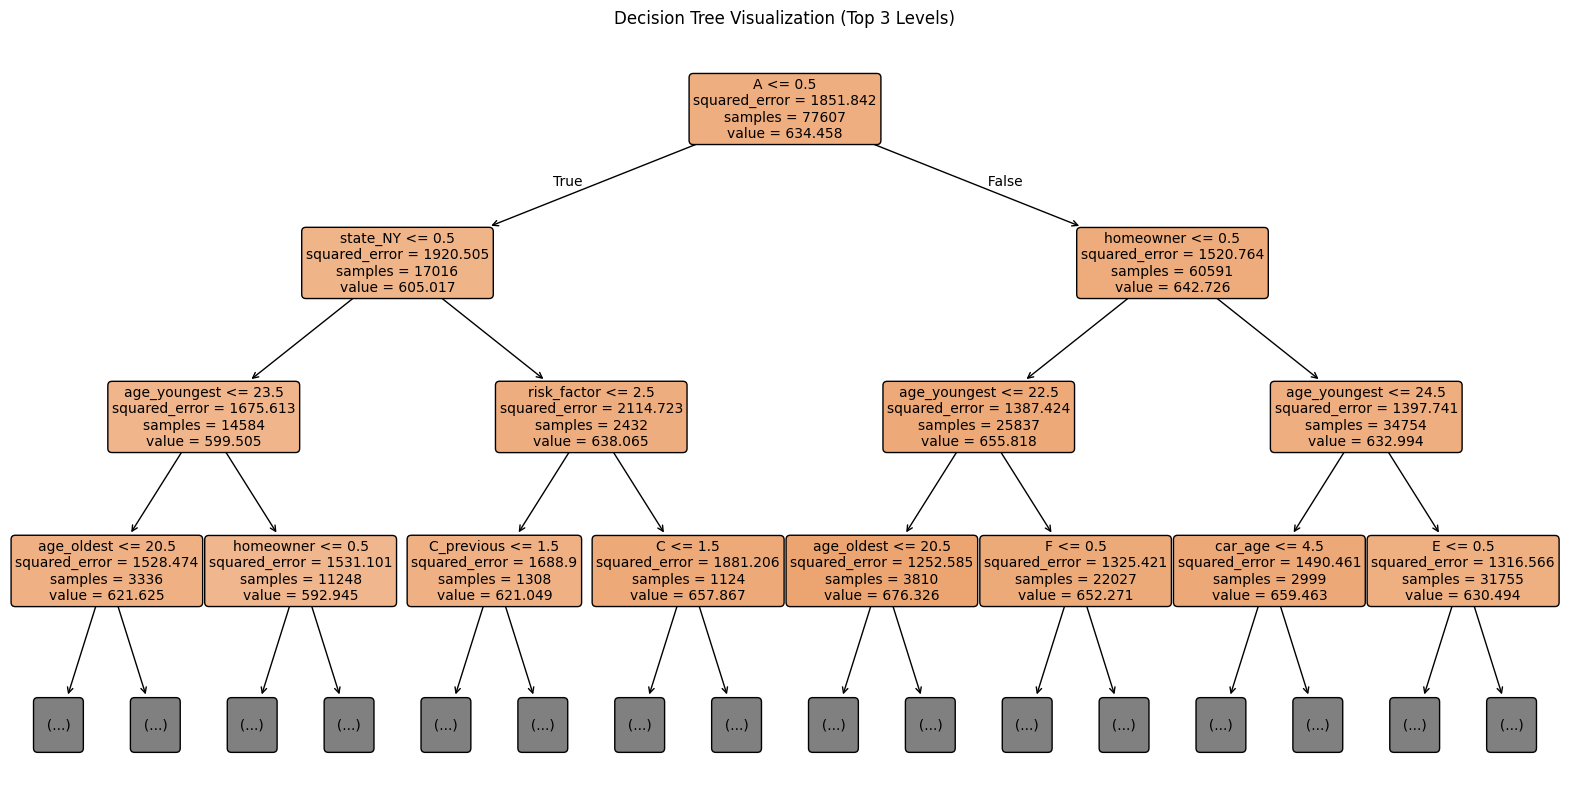

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Show only top 3 levels of the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()

###Feature Importance Plot

####Why This?
Shows which features the model used most

Helps in feature selection

Can guide feature engineering

####What it does:

Ranks features based on how much they reduce error when used in a split.

####Why it's useful:

Find important features → Use in future models

Remove weak features → Reduce noise and training time

Focus on data quality of important features

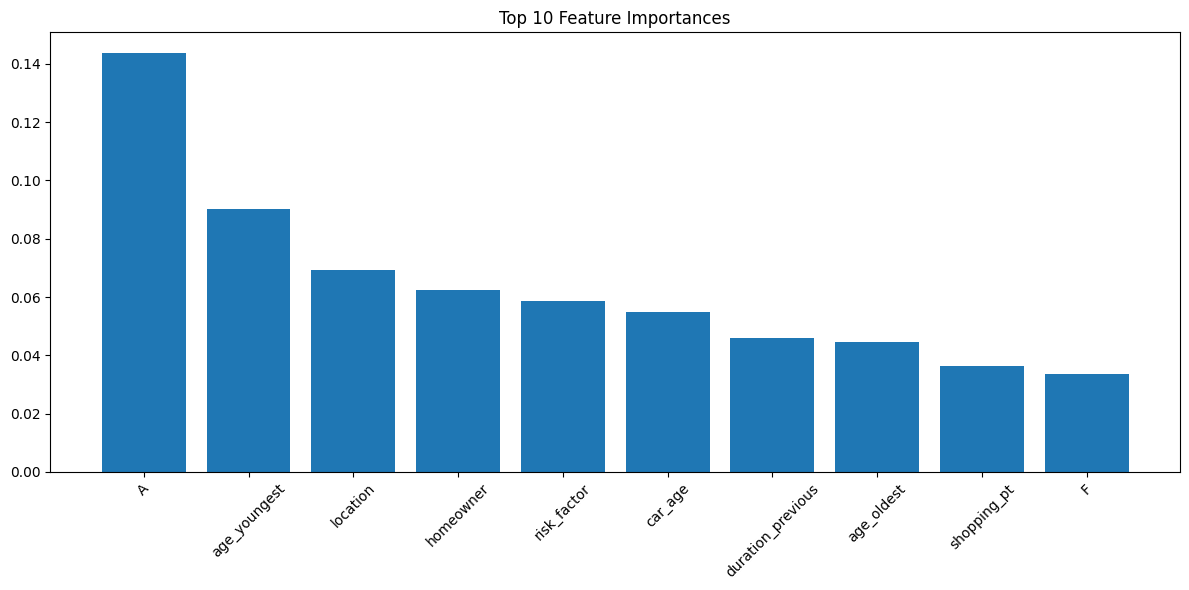

In [45]:
# Get feature importances
importances = dt_model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 10  # Change as needed

# Plot top N features
plt.figure(figsize=(12, 6))
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), feature_names[indices[:top_n]], rotation=45)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

####What You'll Learn from Step 5:

| Insight                        | Why It Matters                           |
| ------------------------------ | ---------------------------------------- |
| Which features matter most     | Focus efforts on improving those         |
| Which paths lead to high costs | Helps explain pricing or fraud detection |
| Tree is too deep?              | Indicates overfitting                    |
| Tree too shallow?              | May be underfitting                      |


#Step 6:
#Model Tuning & Improvement

###Why Model Tuning?
The default DecisionTreeRegressor:

Grows a very deep tree (overfitting risk)

Doesn’t limit splits or leaves

May perform poorly on test data

By tuning, we can:

1.Improve R² Score

2.Reduce MSE

3.Control model complexity


####🔧 Common Hyperparameters to Tune:
| Parameter           | Meaning                                                   |
| ------------------- | --------------------------------------------------------- |
| `max_depth`         | Max depth of the tree (controls overfitting)              |
| `min_samples_split` | Minimum samples to split a node                           |
| `min_samples_leaf`  | Minimum samples at a leaf node                            |
| `max_features`      | Number of features to consider when splitting             |
| `criterion`         | Loss function (e.g., `"squared_error"`, `"friedman_mse"`) |


###Train a Tuned Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize with tuned parameters
tuned_model = DecisionTreeRegressor(
    max_depth=5,               # Limit depth
    min_samples_split=10,      # Require more samples to split
    min_samples_leaf=4,        # Require more samples in leaves
    random_state=42
)

# Train the model
tuned_model.fit(X_train, y_train)

# Predict
y_pred_tuned = tuned_model.predict(X_test)

# Evaluate
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("📉 Tuned Model MSE:", mse_tuned)
print("📊 Tuned Model R² Score:", r2_tuned)

📉 Tuned Model MSE: 1265.189321190707
📊 Tuned Model R² Score: 0.3219504124420207


####Compare with Default Model
| Metric   | Default Model | Tuned Model |
| -------- | ------------- | ----------- |
| MSE      | `1651.87`     | *(1265.20)*     |
| R² Score | `0.115`       | *(0.321)*     |


####Let’s dive into GridSearchCV — one of the most powerful tools to automatically find the best hyperparameters for your Decision Tree model.

###Hyperparameter Tuning with GridSearchCV

####Goal:
Systematically search for the best combination of parameters that maximize model performance (R² Score or minimize MSE).



####🔧 What Is GridSearchCV?
It tries every combination of parameters you specify.

Uses cross-validation (CV) to avoid overfitting on one test split.

Selects the best model based on your scoring metric.

####What We’ll Tune:

| Parameter           | Description                   |
| ------------------- | ----------------------------- |
| `max_depth`         | Tree depth                    |
| `min_samples_split` | Min samples to split a node   |
| `min_samples_leaf`  | Min samples in each leaf node |


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the base model
dtree = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    scoring='r2',          # Optimize for R² score
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1,             # Use all cores
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

####After Fitting:
📝 Get Best Parameters:

In [48]:
print("✅ Best Parameters:", grid_search.best_params_)

✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


###Evaluate Best Model:

In [49]:
best_model = grid_search.best_estimator_

# Predict on test set
y_pred_grid = best_model.predict(X_test)

# Evaluate
r2_grid = r2_score(y_test, y_pred_grid)
mse_grid = mean_squared_error(y_test, y_pred_grid)

print("R² (GridSearch):", r2_grid)
print("MSE (GridSearch):", mse_grid)

R² (GridSearch): 0.4384180896067288
MSE (GridSearch): 1047.8694317363459


Why Use GridSearchCV?

| Benefit                  | Why It Matters                         |
| ------------------------ | -------------------------------------- |
| Full parameter search    | No guesswork, data-driven tuning       |
| Cross-validation         | Avoids overfitting on train-test split |
| Automatically best model | Ready to use for prediction/deployment |


#Step 7:Model Evaluation & Comparison

##Goal:
Compare the performance of:

1.Default Model

2.Manually Tuned Model

3.GridSearchCV Optimized Model



In [50]:
results = {
    'Model': ['Default Tree', 'Tuned Tree', 'GridSearchCV'],
    'R² Score': [r2, r2_tuned, r2_grid],
    'MSE': [mse, mse_tuned, mse_grid]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(results)

# Display neatly
print("🔍 Model Evaluation & Comparison:\n")
display(comparison_df)

comparison_df.sort_values(by='R² Score', ascending=False, inplace=True)
comparison_df.reset_index(drop=True, inplace=True)
display(comparison_df)

🔍 Model Evaluation & Comparison:



,Model,R² Score,MSE
0,Default Tree,0.114720,1651.866354
1,Tuned Tree,0.321950,1265.189321
2,GridSearchCV,0.438418,1047.869432


,Model,R² Score,MSE
0,GridSearchCV,0.438418,1047.869432
1,Tuned Tree,0.321950,1265.189321
2,Default Tree,0.114720,1651.866354


#####What to Look For:

Which model has the highest R² score

Which model has the lowest MSE

Is tuning worth the complexity?

#Step 8:Save the Final Model (for Deployment)

####Use joblib or pickle to save the trained model.

In [51]:
import joblib

# Save the best model (e.g., GridSearchCV result)
joblib.dump(best_model, 'final_model.pkl')

['final_model.pkl']